In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('InterpolatedWithCAPEX2.csv')

In [3]:
df

,Dates,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [4]:
dataset = df.values

In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [6]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        , 0.14011453,
        0.70628215],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 , 0.13991371,
        0.72165108],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641, 0.13971289,
        0.73702   ],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961, 0.13951207,
        0.75238893],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307, 0.13989088,
        0.78331641],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654, 0.14026969,
        0.8142439 ],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        , 0.1406485 ,
        0.84517139],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 , 0.14038687,
        0.85238924],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  , 0.14012524,
        0.85960709],
       [0.17164397, 0.37286814, 0.        , 0.1304085 , 0.13986361,
        0.86682494],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337, 0.14557165,
        0.90348124],
       [0.21746656, 0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 6) (11, 6) (11, 6) (87,) (11,) (11,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='softplus', input_shape=(6,)),
    Dense(32, activation='softplus'),
    Dense(12, activation='softplus'),
    Dense(1, activation='softplus'),
])

In [13]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 0s 2ms/step - loss: 717.5549 - val_loss: 725.4815
Epoch 2/1500
87/87 [==============================] - 0s 80us/step - loss: 717.4692 - val_loss: 725.4073
Epoch 3/1500
87/87 [==============================] - 0s 57us/step - loss: 717.3950 - val_loss: 725.3369
Epoch 4/1500
87/87 [==============================] - 0s 69us/step - loss: 717.3245 - val_loss: 725.2678
Epoch 5/1500
87/87 [==============================] - 0s 46us/step - loss: 717.2552 - val_loss: 725.1987
Epoch 6/1500
87/87 [==============================] - 0s 57us/step - loss: 717.1862 - val_loss: 725.1293
Epoch 7/1500
87/87 [==============================] - 0s 46us/step - loss: 717.1168 - val_loss: 725.0593
Epoch 8/1500
87/87 [==============================] - 0s 58us/step - loss: 717.0466 - val_loss: 724.9883
Epoch 9/1500
87/87 [==============================] - 0s 69us/step - loss: 716.9755 - val_loss: 724.9163
Epoch 10/150

Epoch 78/1500
87/87 [==============================] - 0s 46us/step - loss: 709.4194 - val_loss: 717.3243
Epoch 79/1500
87/87 [==============================] - 0s 46us/step - loss: 709.2677 - val_loss: 717.1725
Epoch 80/1500
87/87 [==============================] - 0s 46us/step - loss: 709.1146 - val_loss: 717.0192
Epoch 81/1500
87/87 [==============================] - 0s 57us/step - loss: 708.9598 - val_loss: 716.8643
Epoch 82/1500
87/87 [==============================] - 0s 35us/step - loss: 708.8035 - val_loss: 716.7079
Epoch 83/1500
87/87 [==============================] - 0s 46us/step - loss: 708.6455 - val_loss: 716.5499
Epoch 84/1500
87/87 [==============================] - 0s 46us/step - loss: 708.4860 - val_loss: 716.3903
Epoch 85/1500
87/87 [==============================] - 0s 57us/step - loss: 708.3248 - val_loss: 716.2289
Epoch 86/1500
87/87 [==============================] - 0s 57us/step - loss: 708.1619 - val_loss: 716.0661
Epoch 87/1500
87/87 [=========================

Epoch 155/1500
87/87 [==============================] - 0s 57us/step - loss: 691.6235 - val_loss: 699.5984
Epoch 156/1500
87/87 [==============================] - 0s 35us/step - loss: 691.2854 - val_loss: 699.2629
Epoch 157/1500
87/87 [==============================] - 0s 46us/step - loss: 690.9437 - val_loss: 698.9240
Epoch 158/1500
87/87 [==============================] - 0s 58us/step - loss: 690.5985 - val_loss: 698.5817
Epoch 159/1500
87/87 [==============================] - 0s 46us/step - loss: 690.2498 - val_loss: 698.2358
Epoch 160/1500
87/87 [==============================] - 0s 46us/step - loss: 689.8973 - val_loss: 697.8865
Epoch 161/1500
87/87 [==============================] - 0s 69us/step - loss: 689.5414 - val_loss: 697.5336
Epoch 162/1500
87/87 [==============================] - 0s 46us/step - loss: 689.1817 - val_loss: 697.1771
Epoch 163/1500
87/87 [==============================] - 0s 46us/step - loss: 688.8184 - val_loss: 696.8171
Epoch 164/1500
87/87 [===============

Epoch 232/1500
87/87 [==============================] - 0s 46us/step - loss: 653.0719 - val_loss: 661.5527
Epoch 233/1500
87/87 [==============================] - 0s 57us/step - loss: 652.3707 - val_loss: 660.8631
Epoch 234/1500
87/87 [==============================] - 0s 57us/step - loss: 651.6632 - val_loss: 660.1677
Epoch 235/1500
87/87 [==============================] - 0s 57us/step - loss: 650.9496 - val_loss: 659.4662
Epoch 236/1500
87/87 [==============================] - 0s 46us/step - loss: 650.2299 - val_loss: 658.7589
Epoch 237/1500
87/87 [==============================] - 0s 57us/step - loss: 649.5039 - val_loss: 658.0453
Epoch 238/1500
87/87 [==============================] - 0s 57us/step - loss: 648.7717 - val_loss: 657.3258
Epoch 239/1500
87/87 [==============================] - 0s 34us/step - loss: 648.0331 - val_loss: 656.6000
Epoch 240/1500
87/87 [==============================] - 0s 57us/step - loss: 647.2883 - val_loss: 655.8682
Epoch 241/1500
87/87 [===============

Epoch 309/1500
87/87 [==============================] - 0s 69us/step - loss: 578.2336 - val_loss: 588.2319
Epoch 310/1500
87/87 [==============================] - 0s 46us/step - loss: 576.9410 - val_loss: 586.9689
Epoch 311/1500
87/87 [==============================] - 0s 57us/step - loss: 575.6393 - val_loss: 585.6969
Epoch 312/1500
87/87 [==============================] - 0s 46us/step - loss: 574.3281 - val_loss: 584.4158
Epoch 313/1500
87/87 [==============================] - 0s 425us/step - loss: 573.0074 - val_loss: 583.1254
Epoch 314/1500
87/87 [==============================] - 0s 57us/step - loss: 571.6771 - val_loss: 581.8257
Epoch 315/1500
87/87 [==============================] - 0s 69us/step - loss: 570.3373 - val_loss: 580.5169
Epoch 316/1500
87/87 [==============================] - 0s 57us/step - loss: 568.9878 - val_loss: 579.1987
Epoch 317/1500
87/87 [==============================] - 0s 57us/step - loss: 567.6287 - val_loss: 577.8711
Epoch 318/1500
87/87 [==============

Epoch 386/1500
87/87 [==============================] - 0s 69us/step - loss: 447.7017 - val_loss: 460.9677
Epoch 387/1500
87/87 [==============================] - 0s 46us/step - loss: 445.5428 - val_loss: 458.8666
Epoch 388/1500
87/87 [==============================] - 0s 57us/step - loss: 443.3707 - val_loss: 456.7526
Epoch 389/1500
87/87 [==============================] - 0s 57us/step - loss: 441.1853 - val_loss: 454.6258
Epoch 390/1500
87/87 [==============================] - 0s 57us/step - loss: 438.9865 - val_loss: 452.4861
Epoch 391/1500
87/87 [==============================] - 0s 57us/step - loss: 436.7743 - val_loss: 450.3334
Epoch 392/1500
87/87 [==============================] - 0s 57us/step - loss: 434.5486 - val_loss: 448.1676
Epoch 393/1500
87/87 [==============================] - 0s 46us/step - loss: 432.3094 - val_loss: 445.9888
Epoch 394/1500
87/87 [==============================] - 0s 57us/step - loss: 430.0566 - val_loss: 443.7969
Epoch 395/1500
87/87 [===============

Epoch 463/1500
87/87 [==============================] - 0s 46us/step - loss: 246.1071 - val_loss: 260.5786
Epoch 464/1500
87/87 [==============================] - 0s 57us/step - loss: 243.5733 - val_loss: 257.5925
Epoch 465/1500
87/87 [==============================] - 0s 46us/step - loss: 241.0781 - val_loss: 254.6698
Epoch 466/1500
87/87 [==============================] - 0s 69us/step - loss: 238.6552 - val_loss: 251.7041
Epoch 467/1500
87/87 [==============================] - 0s 57us/step - loss: 236.1972 - val_loss: 248.6973
Epoch 468/1500
87/87 [==============================] - 0s 69us/step - loss: 233.7641 - val_loss: 245.7560
Epoch 469/1500
87/87 [==============================] - 0s 57us/step - loss: 231.4155 - val_loss: 242.7697
Epoch 470/1500
87/87 [==============================] - 0s 58us/step - loss: 229.0693 - val_loss: 239.8470
Epoch 471/1500
87/87 [==============================] - 0s 57us/step - loss: 226.8906 - val_loss: 237.1047
Epoch 472/1500
87/87 [===============

Epoch 540/1500
87/87 [==============================] - 0s 46us/step - loss: 126.3501 - val_loss: 89.5214
Epoch 541/1500
87/87 [==============================] - 0s 46us/step - loss: 125.9405 - val_loss: 89.4681
Epoch 542/1500
87/87 [==============================] - 0s 57us/step - loss: 125.5187 - val_loss: 89.4140
Epoch 543/1500
87/87 [==============================] - 0s 46us/step - loss: 125.0844 - val_loss: 89.3591
Epoch 544/1500
87/87 [==============================] - 0s 92us/step - loss: 124.6374 - val_loss: 89.3034
Epoch 545/1500
87/87 [==============================] - 0s 46us/step - loss: 124.2000 - val_loss: 89.2543
Epoch 546/1500
87/87 [==============================] - 0s 69us/step - loss: 123.8510 - val_loss: 89.2046
Epoch 547/1500
87/87 [==============================] - 0s 46us/step - loss: 123.4964 - val_loss: 89.1620
Epoch 548/1500
87/87 [==============================] - 0s 69us/step - loss: 123.2161 - val_loss: 89.1303
Epoch 549/1500
87/87 [========================

87/87 [==============================] - 0s 46us/step - loss: 112.7040 - val_loss: 84.4399
Epoch 618/1500
87/87 [==============================] - 0s 46us/step - loss: 112.5265 - val_loss: 84.3252
Epoch 619/1500
87/87 [==============================] - 0s 57us/step - loss: 112.3791 - val_loss: 84.2879
Epoch 620/1500
87/87 [==============================] - 0s 57us/step - loss: 112.2394 - val_loss: 84.1695
Epoch 621/1500
87/87 [==============================] - 0s 57us/step - loss: 112.0865 - val_loss: 84.0489
Epoch 622/1500
87/87 [==============================] - 0s 46us/step - loss: 111.9317 - val_loss: 83.9261
Epoch 623/1500
87/87 [==============================] - 0s 46us/step - loss: 111.7787 - val_loss: 83.8948
Epoch 624/1500
87/87 [==============================] - 0s 46us/step - loss: 111.6414 - val_loss: 83.6906
Epoch 625/1500
87/87 [==============================] - 0s 34us/step - loss: 111.5020 - val_loss: 83.6580
Epoch 626/1500
87/87 [==============================] - 0s 34

Epoch 695/1500
87/87 [==============================] - 0s 69us/step - loss: 101.0848 - val_loss: 76.6339
Epoch 696/1500
87/87 [==============================] - 0s 69us/step - loss: 100.8876 - val_loss: 76.6031
Epoch 697/1500
87/87 [==============================] - 0s 57us/step - loss: 100.7400 - val_loss: 76.3818
Epoch 698/1500
87/87 [==============================] - 0s 57us/step - loss: 100.6408 - val_loss: 76.4349
Epoch 699/1500
87/87 [==============================] - 0s 57us/step - loss: 100.4766 - val_loss: 76.2160
Epoch 700/1500
87/87 [==============================] - 0s 69us/step - loss: 100.3167 - val_loss: 76.1837
Epoch 701/1500
87/87 [==============================] - 0s 46us/step - loss: 100.1353 - val_loss: 76.0123
Epoch 702/1500
87/87 [==============================] - 0s 58us/step - loss: 100.0054 - val_loss: 75.9840
Epoch 703/1500
87/87 [==============================] - 0s 57us/step - loss: 99.8560 - val_loss: 75.7494
Epoch 704/1500
87/87 [=========================

Epoch 773/1500
87/87 [==============================] - 0s 69us/step - loss: 89.0715 - val_loss: 67.9526
Epoch 774/1500
87/87 [==============================] - 0s 69us/step - loss: 89.0081 - val_loss: 67.5694
Epoch 775/1500
87/87 [==============================] - 0s 57us/step - loss: 88.8949 - val_loss: 67.9201
Epoch 776/1500
87/87 [==============================] - 0s 69us/step - loss: 88.9754 - val_loss: 67.6059
Epoch 777/1500
87/87 [==============================] - 0s 58us/step - loss: 88.4821 - val_loss: 67.4656
Epoch 778/1500
87/87 [==============================] - 0s 92us/step - loss: 88.3294 - val_loss: 67.3910
Epoch 779/1500
87/87 [==============================] - 0s 81us/step - loss: 88.1911 - val_loss: 67.2424
Epoch 780/1500
87/87 [==============================] - 0s 103us/step - loss: 88.0341 - val_loss: 67.1669
Epoch 781/1500
87/87 [==============================] - 0s 57us/step - loss: 87.8930 - val_loss: 67.0095
Epoch 782/1500
87/87 [==============================] 

87/87 [==============================] - 0s 57us/step - loss: 78.2795 - val_loss: 61.0760
Epoch 852/1500
87/87 [==============================] - 0s 57us/step - loss: 78.1897 - val_loss: 60.6180
Epoch 853/1500
87/87 [==============================] - 0s 46us/step - loss: 78.1882 - val_loss: 61.0524
Epoch 854/1500
87/87 [==============================] - 0s 46us/step - loss: 77.9585 - val_loss: 60.4797
Epoch 855/1500
87/87 [==============================] - 0s 57us/step - loss: 77.8839 - val_loss: 61.0250
Epoch 856/1500
87/87 [==============================] - 0s 57us/step - loss: 77.7276 - val_loss: 60.3404
Epoch 857/1500
87/87 [==============================] - 0s 69us/step - loss: 77.5856 - val_loss: 60.9935
Epoch 858/1500
87/87 [==============================] - 0s 57us/step - loss: 77.4964 - val_loss: 60.2001
Epoch 859/1500
87/87 [==============================] - 0s 57us/step - loss: 77.2923 - val_loss: 60.9574
Epoch 860/1500
87/87 [==============================] - 0s 69us/step -

Epoch 930/1500
87/87 [==============================] - 0s 57us/step - loss: 68.3385 - val_loss: 56.2101
Epoch 931/1500
87/87 [==============================] - 0s 69us/step - loss: 68.1197 - val_loss: 56.7677
Epoch 932/1500
87/87 [==============================] - 0s 58us/step - loss: 67.9545 - val_loss: 56.3492
Epoch 933/1500
87/87 [==============================] - 0s 57us/step - loss: 67.8195 - val_loss: 56.4413
Epoch 934/1500
87/87 [==============================] - 0s 69us/step - loss: 67.6852 - val_loss: 56.5307
Epoch 935/1500
87/87 [==============================] - 0s 80us/step - loss: 67.5762 - val_loss: 56.0398
Epoch 936/1500
87/87 [==============================] - 0s 69us/step - loss: 67.4645 - val_loss: 56.6918
Epoch 937/1500
87/87 [==============================] - 0s 69us/step - loss: 67.3872 - val_loss: 55.8889
Epoch 938/1500
87/87 [==============================] - 0s 69us/step - loss: 67.2119 - val_loss: 56.5578
Epoch 939/1500
87/87 [==============================] -

Epoch 1008/1500
87/87 [==============================] - 0s 57us/step - loss: 58.1783 - val_loss: 52.3928
Epoch 1009/1500
87/87 [==============================] - 0s 57us/step - loss: 58.0304 - val_loss: 52.2064
Epoch 1010/1500
87/87 [==============================] - 0s 69us/step - loss: 57.9111 - val_loss: 52.5083
Epoch 1011/1500
87/87 [==============================] - 0s 57us/step - loss: 57.7802 - val_loss: 52.2845
Epoch 1012/1500
87/87 [==============================] - 0s 92us/step - loss: 57.6441 - val_loss: 52.0454
Epoch 1013/1500
87/87 [==============================] - 0s 57us/step - loss: 57.5231 - val_loss: 52.3566
Epoch 1014/1500
87/87 [==============================] - 0s 92us/step - loss: 57.3905 - val_loss: 51.5084
Epoch 1015/1500
87/87 [==============================] - 0s 57us/step - loss: 57.3153 - val_loss: 52.8507
Epoch 1016/1500
87/87 [==============================] - 0s 57us/step - loss: 57.2644 - val_loss: 51.2413
Epoch 1017/1500
87/87 [=======================

Epoch 1086/1500
87/87 [==============================] - 0s 46us/step - loss: 49.2820 - val_loss: 49.2425
Epoch 1087/1500
87/87 [==============================] - 0s 69us/step - loss: 49.2613 - val_loss: 50.2141
Epoch 1088/1500
87/87 [==============================] - 0s 46us/step - loss: 49.1418 - val_loss: 49.3012
Epoch 1089/1500
87/87 [==============================] - 0s 46us/step - loss: 49.0570 - val_loss: 50.2634
Epoch 1090/1500
87/87 [==============================] - 0s 57us/step - loss: 48.9995 - val_loss: 49.3504
Epoch 1091/1500
87/87 [==============================] - 0s 46us/step - loss: 48.8536 - val_loss: 50.3043
Epoch 1092/1500
87/87 [==============================] - 0s 46us/step - loss: 48.8551 - val_loss: 49.3905
Epoch 1093/1500
87/87 [==============================] - 0s 57us/step - loss: 48.6824 - val_loss: 49.3906
Epoch 1094/1500
87/87 [==============================] - 0s 57us/step - loss: 48.6063 - val_loss: 48.9032
Epoch 1095/1500
87/87 [=======================

Epoch 1164/1500
87/87 [==============================] - 0s 57us/step - loss: 44.1910 - val_loss: 46.5184
Epoch 1165/1500
87/87 [==============================] - 0s 46us/step - loss: 44.1541 - val_loss: 46.0682
Epoch 1166/1500
87/87 [==============================] - 0s 46us/step - loss: 44.1543 - val_loss: 46.4787
Epoch 1167/1500
87/87 [==============================] - 0s 57us/step - loss: 44.1302 - val_loss: 46.0540
Epoch 1168/1500
87/87 [==============================] - 0s 46us/step - loss: 44.0270 - val_loss: 46.2972
Epoch 1169/1500
87/87 [==============================] - 0s 57us/step - loss: 44.0324 - val_loss: 46.0280
Epoch 1170/1500
87/87 [==============================] - 0s 46us/step - loss: 43.9698 - val_loss: 45.8859
Epoch 1171/1500
87/87 [==============================] - 0s 69us/step - loss: 43.9356 - val_loss: 45.7403
Epoch 1172/1500
87/87 [==============================] - 0s 46us/step - loss: 43.9103 - val_loss: 45.8145
Epoch 1173/1500
87/87 [=======================

Epoch 1242/1500
87/87 [==============================] - 0s 46us/step - loss: 42.3538 - val_loss: 42.3737
Epoch 1243/1500
87/87 [==============================] - 0s 57us/step - loss: 42.2198 - val_loss: 42.4730
Epoch 1244/1500
87/87 [==============================] - 0s 46us/step - loss: 42.2735 - val_loss: 42.2551
Epoch 1245/1500
87/87 [==============================] - 0s 57us/step - loss: 42.2686 - val_loss: 42.2824
Epoch 1246/1500
87/87 [==============================] - 0s 69us/step - loss: 42.1580 - val_loss: 42.3461
Epoch 1247/1500
87/87 [==============================] - 0s 46us/step - loss: 42.2697 - val_loss: 42.0986
Epoch 1248/1500
87/87 [==============================] - 0s 57us/step - loss: 42.1268 - val_loss: 42.1874
Epoch 1249/1500
87/87 [==============================] - 0s 58us/step - loss: 42.1170 - val_loss: 42.2475
Epoch 1250/1500
87/87 [==============================] - 0s 46us/step - loss: 42.1885 - val_loss: 42.0023
Epoch 1251/1500
87/87 [=======================

Epoch 1320/1500
87/87 [==============================] - 0s 46us/step - loss: 40.9053 - val_loss: 40.9905
Epoch 1321/1500
87/87 [==============================] - 0s 57us/step - loss: 40.8701 - val_loss: 40.8508
Epoch 1322/1500
87/87 [==============================] - 0s 57us/step - loss: 40.8682 - val_loss: 41.1335
Epoch 1323/1500
87/87 [==============================] - 0s 46us/step - loss: 40.8677 - val_loss: 40.9844
Epoch 1324/1500
87/87 [==============================] - 0s 46us/step - loss: 40.8298 - val_loss: 40.8302
Epoch 1325/1500
87/87 [==============================] - 0s 57us/step - loss: 40.8243 - val_loss: 41.1416
Epoch 1326/1500
87/87 [==============================] - 0s 46us/step - loss: 40.8282 - val_loss: 40.9786
Epoch 1327/1500
87/87 [==============================] - 0s 46us/step - loss: 40.7877 - val_loss: 40.8106
Epoch 1328/1500
87/87 [==============================] - 0s 57us/step - loss: 40.7760 - val_loss: 41.1495
Epoch 1329/1500
87/87 [=======================

Epoch 1398/1500
87/87 [==============================] - 0s 46us/step - loss: 39.9976 - val_loss: 41.4125
Epoch 1399/1500
87/87 [==============================] - 0s 57us/step - loss: 40.0293 - val_loss: 41.1583
Epoch 1400/1500
87/87 [==============================] - 0s 57us/step - loss: 39.9945 - val_loss: 41.3772
Epoch 1401/1500
87/87 [==============================] - 0s 46us/step - loss: 40.0091 - val_loss: 41.1069
Epoch 1402/1500
87/87 [==============================] - 0s 46us/step - loss: 39.9956 - val_loss: 42.0380
Epoch 1403/1500
87/87 [==============================] - 0s 46us/step - loss: 40.1606 - val_loss: 41.1450
Epoch 1404/1500
87/87 [==============================] - 0s 46us/step - loss: 39.9812 - val_loss: 41.9682
Epoch 1405/1500
87/87 [==============================] - 0s 57us/step - loss: 40.1199 - val_loss: 41.1741
Epoch 1406/1500
87/87 [==============================] - 0s 58us/step - loss: 39.9742 - val_loss: 41.5164
Epoch 1407/1500
87/87 [=======================

Epoch 1476/1500
87/87 [==============================] - 0s 46us/step - loss: 39.7089 - val_loss: 41.3699
Epoch 1477/1500
87/87 [==============================] - 0s 69us/step - loss: 39.7458 - val_loss: 42.2124
Epoch 1478/1500
87/87 [==============================] - 0s 57us/step - loss: 39.6879 - val_loss: 41.3916
Epoch 1479/1500
87/87 [==============================] - 0s 46us/step - loss: 39.7433 - val_loss: 42.2082
Epoch 1480/1500
87/87 [==============================] - 0s 57us/step - loss: 39.6682 - val_loss: 41.4123
Epoch 1481/1500
87/87 [==============================] - 0s 57us/step - loss: 39.7415 - val_loss: 42.2066
Epoch 1482/1500
87/87 [==============================] - 0s 57us/step - loss: 39.6528 - val_loss: 41.5031
Epoch 1483/1500
87/87 [==============================] - 0s 58us/step - loss: 39.6692 - val_loss: 41.8215
Epoch 1484/1500
87/87 [==============================] - 0s 58us/step - loss: 39.6077 - val_loss: 41.9610
Epoch 1485/1500
87/87 [=======================

In [15]:
import matplotlib.pyplot as plt

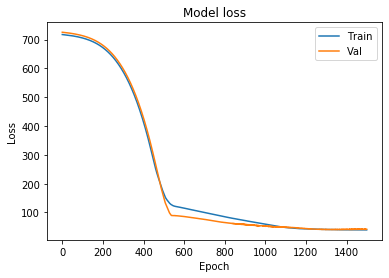

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()